# Normalisation of atmospheric transparency at OHP
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : October 19th 2018

The goal is to compare transparency at OHP wrt Rayleigh scattering :
- according data in MERRA2
- libradtran as light transport code


In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [38]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [39]:
from astropy.io import fits

In [40]:
import libsimulateTranspOHPScattAbsAer as atmsim

In [41]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [42]:
import libatmscattering as ray

# Configuration

## airmass

In [43]:
z_airmass=1.0

In [44]:
all_airmass=np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5])

In [45]:
NBSIMU=all_airmass.shape[0]

## Seasons

In [46]:
YEARSTR="2018"

### Winter

In [47]:
pwv_w=10.2
o3_w=370.1
P_w=932.8
aer_w=0

### Summer

In [48]:
pwv_s=25.1
o3_s=318.1
P_s=938.9
aer_s=0

# Single simulation

In [49]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_w,o3_w,aer_w,P_w,'mw','sc') 

In [50]:
fullfilename=os.path.join(path,file)

In [51]:
data=np.loadtxt(fullfilename)

In [52]:
wl_w=data[:,0]

In [53]:
WL=wl_w
NB_atm_DATA=len(WL)

In [54]:
atm_w=data[:,1]

In [55]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_s,o3_s,aer_s,P_s,'ms','sc') 

In [56]:
fullfilename=os.path.join(path,file)

In [57]:
data=np.loadtxt(fullfilename)

In [58]:
wl_s=data[:,0]

In [59]:
WL=wl_s
NB_atm_DATA=len(WL)

In [60]:
atm_s=data[:,1]

In [61]:
tau_ray=ray.RayOptDepth_adiabatic(WL, altitude=650., costh=1./z_airmass)

In [62]:
transm_ray=np.exp(-tau_ray)

## Calculated atmospheric profile for Rayleigh

In [63]:
altitudes=np.linspace(0.,10000.,5000)
press=ray.Pressure_adiabatic(altitudes)
press=press/100.

In [64]:
np.where(np.logical_and(press>=P_w,press<P_w+0.5))[0]

array([344, 345, 346])

In [65]:
np.where(np.logical_and(press>=P_s,press<P_s+0.5))[0]

array([317, 318, 319])

In [66]:
alt_w=altitudes[345]
alt_s=altitudes[318]

In [67]:
alt_w

690.13802760552107

In [68]:
alt_s

636.12722544508904

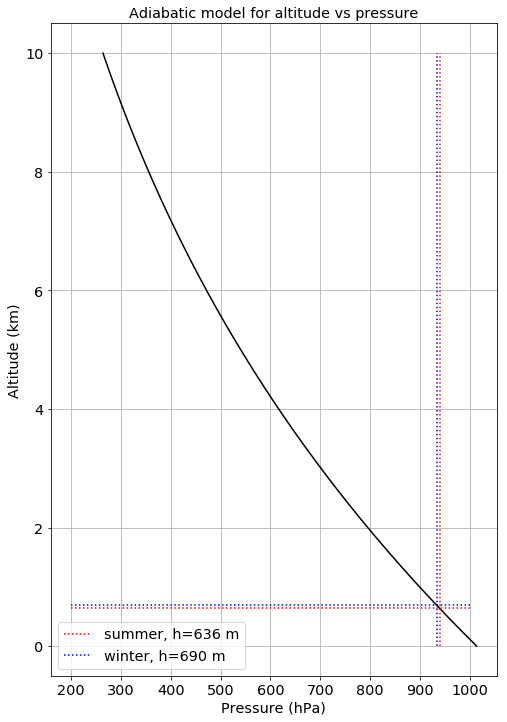

In [69]:
plt.figure(figsize=(8,12))
plt.title("Adiabatic model for altitude vs pressure")
figname="AtmModel.png"
plt.plot(press,altitudes/1000,'k-')
label_w="winter, h={:d} m".format(int(alt_w))
label_s="summer, h={:d} m".format(int(alt_s))
plt.plot([P_s,P_s],[0.,10],'r:',label=label_s)
plt.plot([P_w,P_w],[0.,10],'b:',label=label_w)
plt.plot([200.,1000.],[alt_s/1000,alt_s/1000],'r:')
plt.plot([200.,1000.],[alt_w/1000,alt_w/1000],'b:')
plt.xlabel("Pressure (hPa)")
plt.ylabel("Altitude (km)")
plt.legend()
plt.grid()
plt.savefig(figname)

In [70]:
tau_ray_w=ray.RayOptDepth_adiabatic(WL, altitude=alt_w, costh=1./z_airmass)
tau_ray_s=ray.RayOptDepth_adiabatic(WL, altitude=alt_s, costh=1./z_airmass)

In [71]:
transm_ray_s=np.exp(-tau_ray_s)
transm_ray_w=np.exp(-tau_ray_w)

## Atmospheric transparency

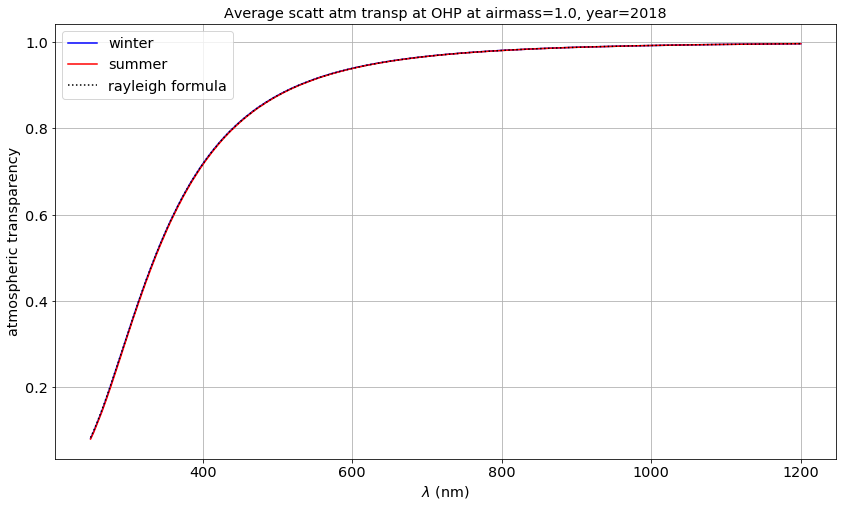

In [72]:
title="Average scatt atm transp at OHP at airmass={}, year={}".format(z_airmass,YEARSTR)
figname="sc_atm_transp_ohp_ws_am_{}_y_{}.png".format(int(z_airmass*10),YEARSTR)
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w,'b-',label="winter")
plt.plot(wl_s,atm_s,'r-',label="summer")
plt.plot(WL,transm_ray,'k:',label="rayleigh formula")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")
plt.grid()
plt.legend()
plt.title(title)
plt.savefig(figname)

## Atmospheric transparency ratio

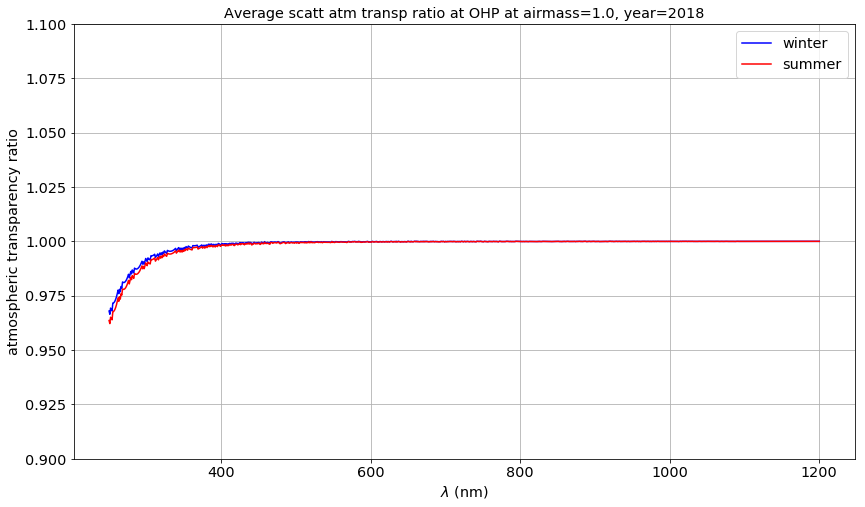

In [73]:
title="Average scatt atm transp ratio at OHP at airmass={}, year={}".format(z_airmass,YEARSTR)
figname="sc_atm_transp_ratio_ohp_ws_am_{}_y_{}.png".format(int(z_airmass*10),YEARSTR)
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w/transm_ray_w,'b-',label="winter")
plt.plot(wl_w,atm_s/transm_ray_s,'r-',label="summer")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.grid()
plt.legend()
plt.title(title)
plt.ylim(0.9,1.1)
plt.savefig(figname)

# Many simulations

In [74]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBSIMU)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [75]:
atm_summer=np.zeros((NB_atm_DATA,NBSIMU+1))
atm_winter=np.zeros((NB_atm_DATA,NBSIMU+1))
atm_ray_w=np.zeros((NB_atm_DATA,NBSIMU+1))
atm_ray_s=np.zeros((NB_atm_DATA,NBSIMU+1))

In [76]:
atm_summer[:,0]=np.copy(WL)
atm_winter[:,0]=np.copy(WL)
atm_ray_w[:,0]=np.copy(WL)
atm_ray_s[:,0]=np.copy(WL)

In [77]:
for idx in np.arange(NBSIMU):
    airmass=all_airmass[idx]
    path,file=atmsim.ProcessSimulationaer(airmass,pwv_w,o3_w,aer_w,P_w,'mw','sc') 
    #path,file=atmsim.ProcessSimulationaer(airmass,pwv_w,0,aer_w,P_w,'mw') 
    fullfilename=os.path.join(path,file)
    data=np.loadtxt(fullfilename)
    atm_winter[:,idx+1]=data[:,1]
    atm_ray_w[:,idx+1]=np.exp(-ray.RayOptDepth_adiabatic(WL, altitude=alt_w, costh=1./airmass))
    path,file=atmsim.ProcessSimulationaer(airmass,pwv_s,o3_s,aer_s,P_s,'ms','sc')
    #path,file=atmsim.ProcessSimulationaer(airmass,pwv_s,0,aer_s,P_s,'ms')
    fullfilename=os.path.join(path,file)
    data=np.loadtxt(fullfilename)
    atm_summer[:,idx+1]=data[:,1]
    atm_ray_s[:,idx+1]=np.exp(-ray.RayOptDepth_adiabatic(WL, altitude=alt_s, costh=1./airmass))
    

# Plot

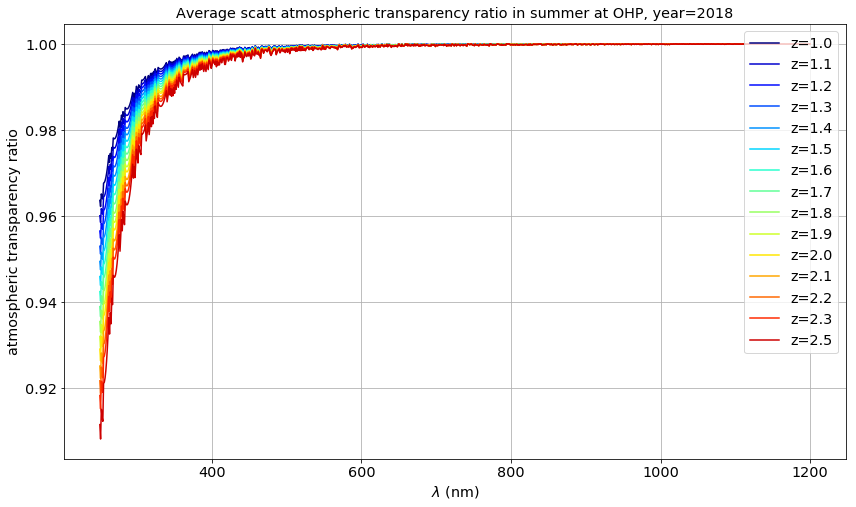

In [78]:
title="Average scatt atmospheric transparency ratio in summer at OHP, year={}".format(YEARSTR)
figname="sc_atm_transp_ohp_summer_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_summer[:,0],atm_summer[:,idx+1]/atm_ray_s[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.legend(loc='upper right')
plt.savefig(figname)

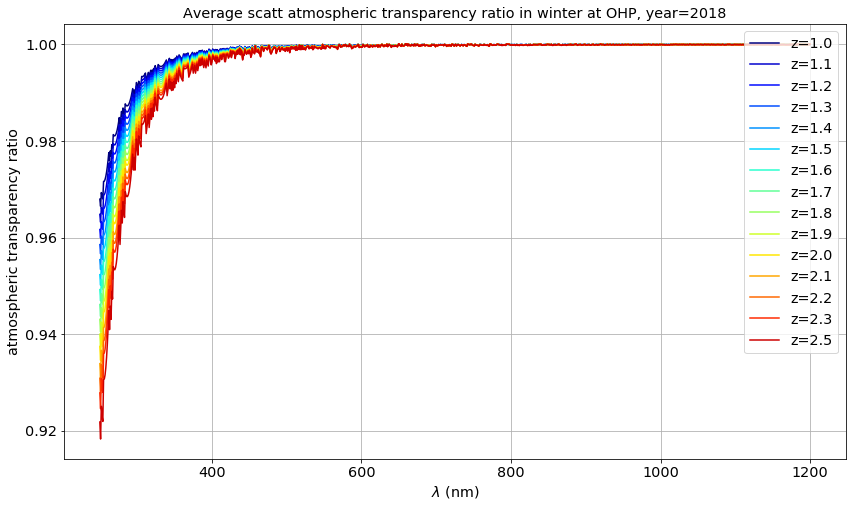

In [79]:
title="Average scatt atmospheric transparency ratio in winter at OHP, year={}".format(YEARSTR)
figname="sc_atm_transp_ohp_winter_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_winter[:,0],atm_winter[:,idx+1]/atm_ray_w[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.legend(loc='upper right')
plt.savefig(figname)

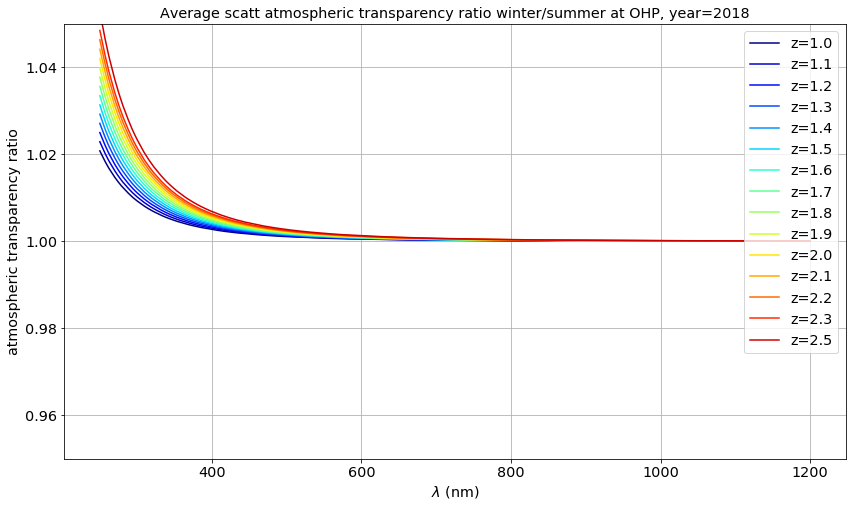

In [80]:
title="Average scatt atmospheric transparency ratio winter/summer at OHP, year={}".format(YEARSTR)
figname="sc_atm_transp_ratio_ohp_wintdivsum_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_winter[:,0],atm_winter[:,idx+1]/atm_summer[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.legend(loc='upper right')
plt.ylim(0.95,1.05)
plt.savefig(figname)

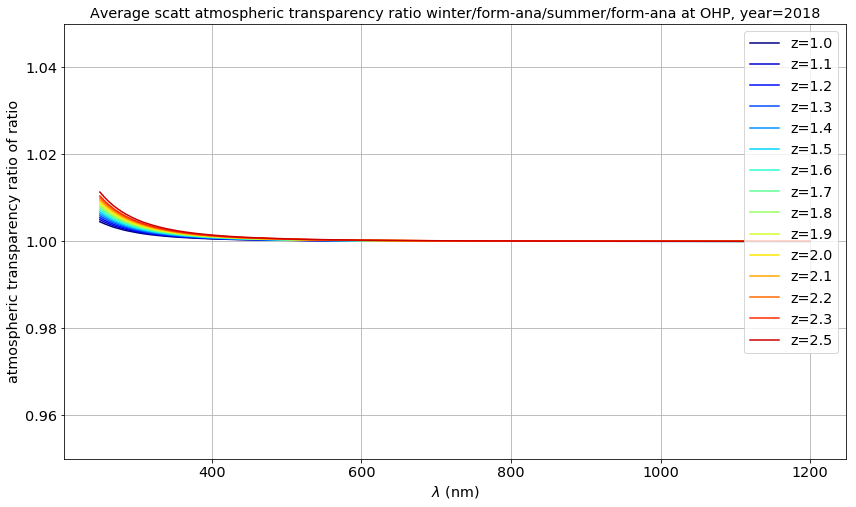

In [81]:
title="Average scatt atmospheric transparency ratio winter/form-ana/summer/form-ana at OHP, year={}".format(YEARSTR)
figname="sc_atm_transp_ratio_ratio_ohp_wintdivsum_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    factor=atm_ray_s[:,idx+1]/atm_ray_w[:,idx+1]
    plt.plot(atm_winter[:,0],factor*atm_winter[:,idx+1]/atm_summer[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio of ratio")
plt.legend(loc='upper right')
plt.ylim(0.95,1.05)
plt.savefig(figname)